# Fuzzy Clustering using QPSO

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## import ExtractRulesQPSO class
import sys, os
sys.path.append(os.getcwd() + '/scripts')
from ExtractRulesQPSO import ExtractRulesQPSO
from FuzzyClustering import FuzzyClustering
from FuzzyRule import FuzzyRule

## Example 

### Generating synthetic data

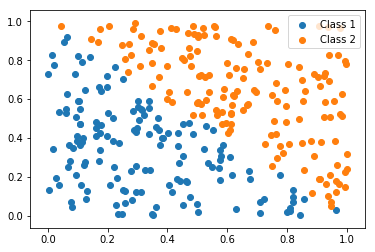

In [2]:
random_numbers = np.random.rand(1000)
N = 300  ## number of data points
tmp_c1 = []
tmp_c2 = []

for i in range(N):
    v_tmp = np.random.rand(2)
    
    if (v_tmp[0] + v_tmp[1] <= 1):
        tmp_c1.append(v_tmp)
    else:
        tmp_c2.append(v_tmp)

## Synthetic data for two classes
data_c1 = np.array(tmp_c1)
data_c2 = np.array(tmp_c2)

plt.scatter(data_c1[:,0], data_c1[:,1], label = 'Class 1')
plt.scatter(data_c2[:,0], data_c2[:,1], label = 'Class 2')
plt.legend()

### Applying fuzzy clustering

In [3]:
fc1 = FuzzyClustering(data_c1)
fc2 = FuzzyClustering(data_c2)

In [4]:
## finding centers
fc1.extractClusteringCenters()
centers_c1 = fc1.getDenormalizedClusterCenters()
fc2.extractClusteringCenters()
centers_c2 = fc2.getDenormalizedClusterCenters()

In [5]:
centers_c1, centers_c2

(array([[0.23735162, 0.37491576],
        [0.57691795, 0.18607845],
        [0.11541623, 0.79325468]]), array([[0.63381516, 0.64334361],
        [0.34728623, 0.889737  ],
        [0.89139748, 0.30625163]]))

In [6]:
centers_c1_df = pd.DataFrame(centers_c1)
num_rules_c1 = len(centers_c1)
centers_c1_df.columns = ['x' + str(i + 1) for i in range(len(centers_c1[0]))]
centers_c1_df['class_label'] = 'Y1'

centers_c2_df = pd.DataFrame(centers_c2)
num_rules_c2 = len(centers_c2)
centers_c2_df.columns = ['x' + str(i + 1) for i in range(len(centers_c2[0]))]
centers_c2_df['class_label'] = 'Y2'

In [7]:
all_class_centers = []
all_class_centers.append(centers_c1)
all_class_centers.append(centers_c2)

all_class_centers

[array([[0.23735162, 0.37491576],
        [0.57691795, 0.18607845],
        [0.11541623, 0.79325468]]), array([[0.63381516, 0.64334361],
        [0.34728623, 0.889737  ],
        [0.89139748, 0.30625163]])]

In [8]:
centers_c1_df.loc[:, centers_c1_df.columns != 'class_label'].iloc[[2]]

,x1,x2
2,0.115416,0.793255


### Plotting resulting cluster centers

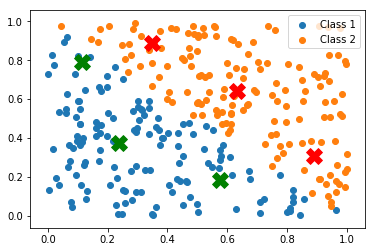

In [9]:
plt.scatter(data_c1[:,0], data_c1[:,1], label = 'Class 1')
plt.scatter(data_c2[:,0], data_c2[:,1], label = 'Class 2')

## Add centers of class 1
for cs in centers_c1:
    plt.scatter(cs[0], cs[1], marker = 'X', color = 'green', s = 250)

## Add centers of class 2
for cs in centers_c2:
    plt.scatter(cs[0], cs[1], marker = 'X', color = 'red', s = 250)

plt.legend()

## Use QPSO to optimize the rules

In [10]:
qpso = ExtractRulesQPSO(30, 50, 2 * (len(centers_c1) + len(centers_c2)))

In [11]:
qpso.solver([centers_c1, centers_c2], [data_c1, data_c2])

In [12]:
qpso.best_particle

array([ 9.56727970e-02,  4.13315543e+00,  5.56801471e+00, -1.27287435e-02,
       -1.88064329e-02,  1.85396077e+00,  1.97853496e-01, -9.37057251e-01,
        9.73315690e-01, -1.55649345e-01,  3.35394410e-01, -1.53617104e+01])

In [13]:
tuned_stds = ExtractRulesQPSO._arrangeStds(qpso.best_particle, all_class_centers)
tuned_stds

[array([[ 0.0956728 ,  4.13315543],
        [ 5.56801471, -0.01272874],
        [-0.01880643,  1.85396077]]), array([[  0.1978535 ,  -0.93705725],
        [  0.97331569,  -0.15564934],
        [  0.33539441, -15.36171043]])]

### Show rules for both classes

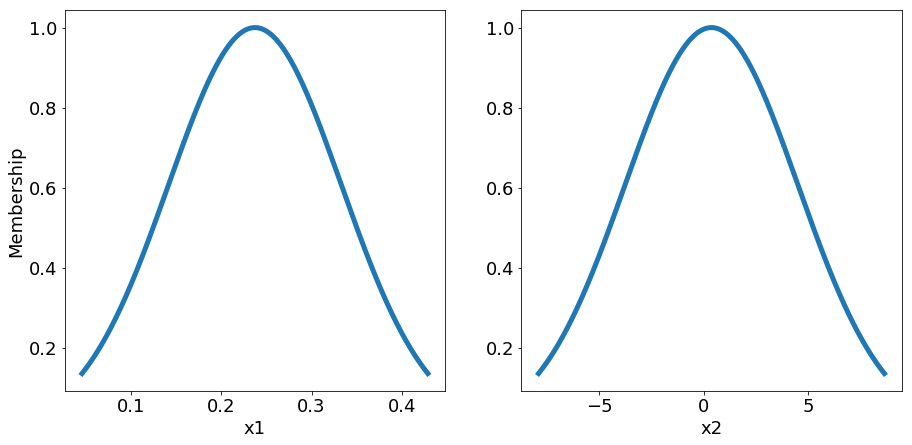

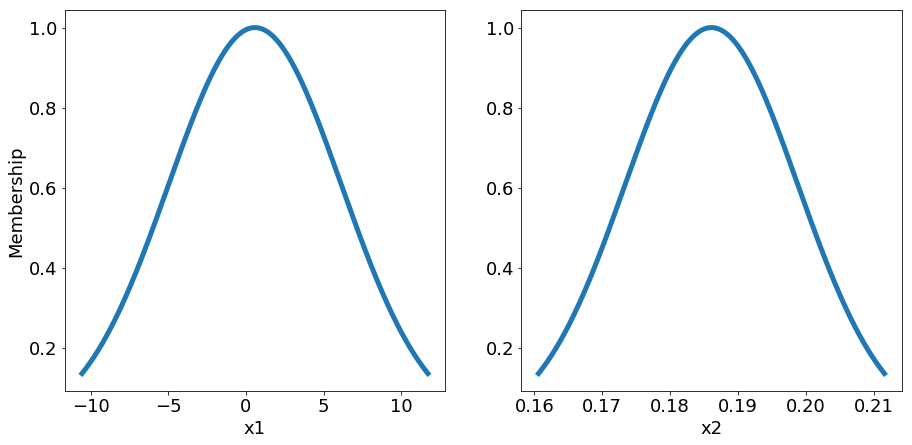

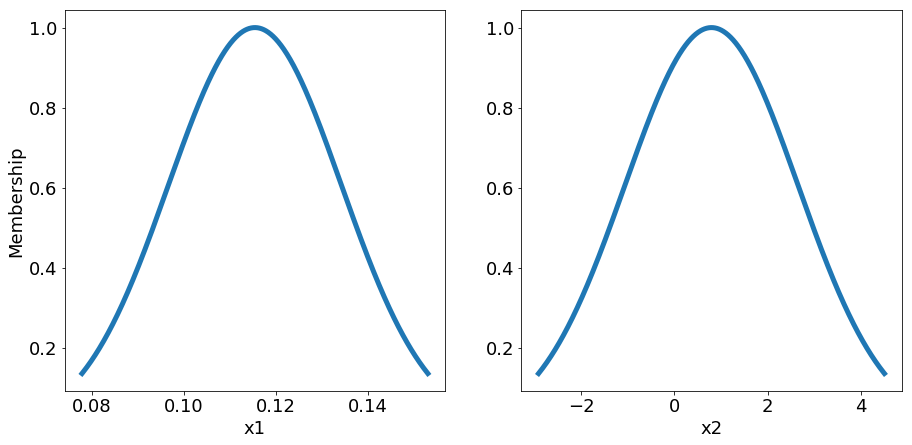

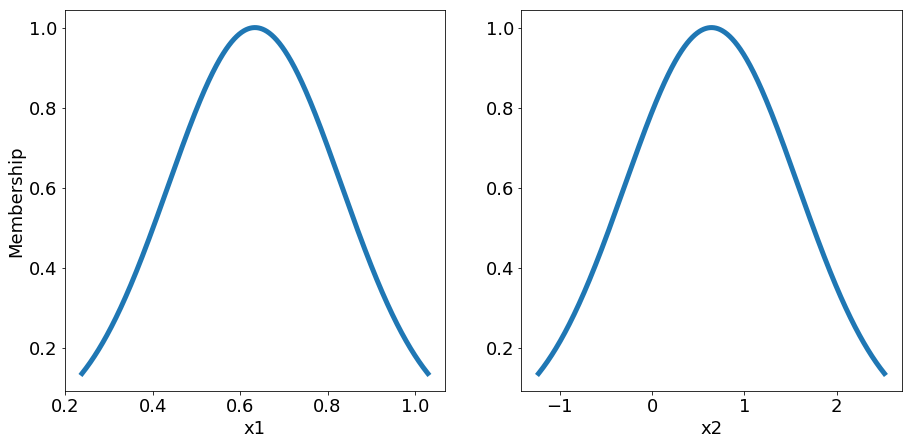

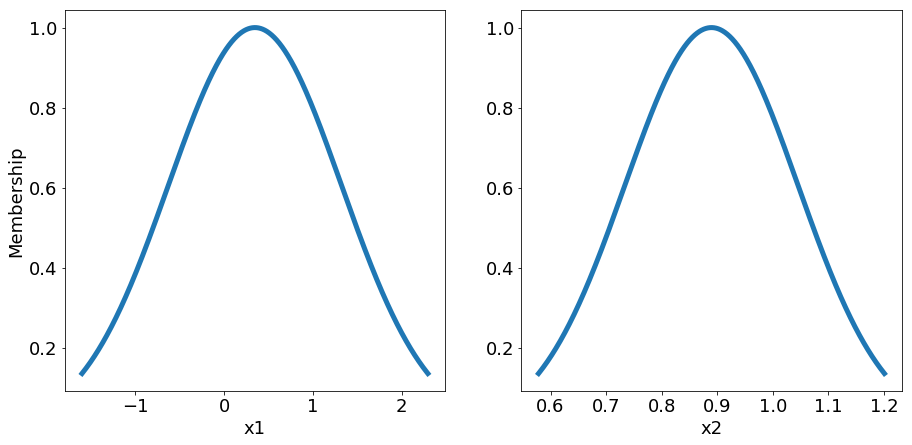

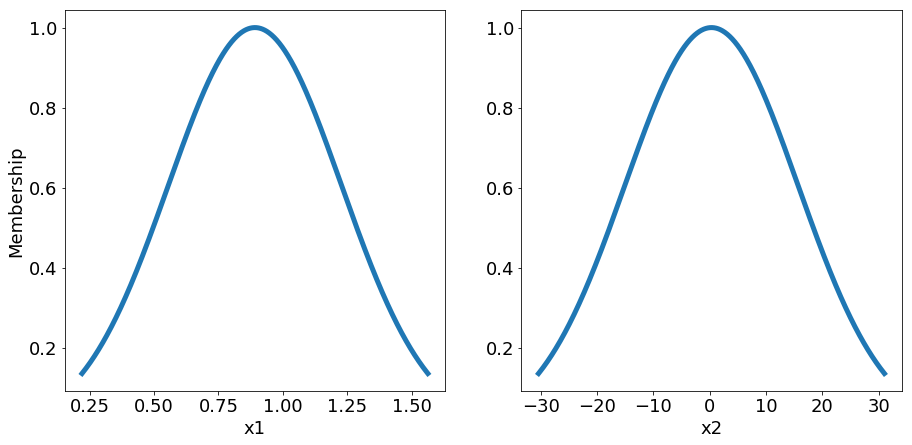

In [14]:
class_labels = ['Y1', 'Y2']

for all_centers, all_stds, class_label in zip(all_class_centers, tuned_stds, class_labels):
    # iterate through all classes
    
    for centers, stds in zip(all_centers, all_stds):
        # iterate through all rules
        rule = FuzzyRule(centers, stds, class_label)
        rule.plotRule()